In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
theta = np.linspace(0, 2 * np.pi, 150)
radius = 55
SAT_len = 22
SAT_plane = 2

In [3]:
SATs = np.zeros((SAT_len*SAT_plane, 3, 150))
for i in range(SAT_len):
    SATs[i,0,:] = 65*i + radius * np.cos(theta)
    SATs[i,1,:] =  10  + radius * np.sin(theta)

    SATs[i + SAT_len,0,:] = -25 + 65*i + radius * np.cos(theta)
    SATs[i + SAT_len,1,:] =  10 +   65 + radius * np.sin(theta)

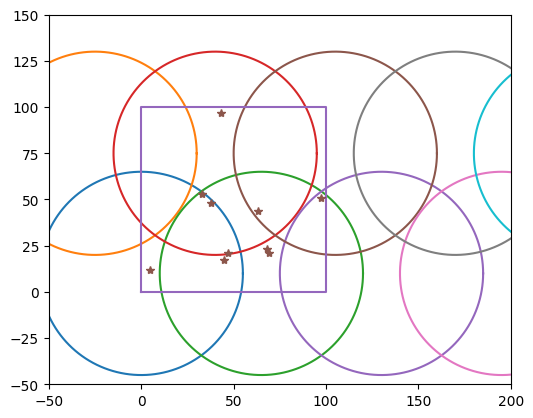

In [4]:
rect = [[0,0], [100,0], [0,100], [100,100]]

GS_size = 10
GSs = np.zeros((GS_size, 3))

for i in range(GS_size):
    GSs[i][0] = np.random.randint(0,100 + 1)
    GSs[i][1] = np.random.randint(0,100 + 1)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

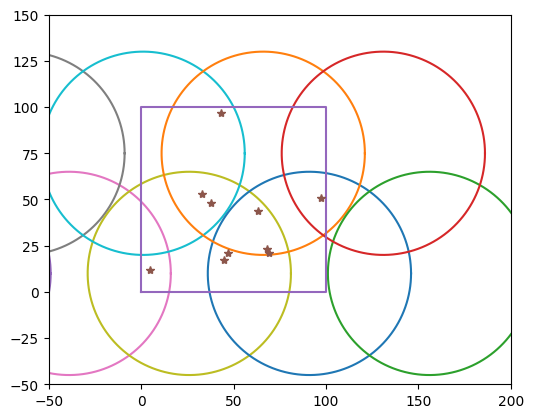

In [5]:
def SAT_location(SAT, SAT_len, time, speed, radius, theta):
    for i in range(SAT_len):
        SAT[i,0,:] = 65*i -speed * time + radius * np.cos(theta)
        SAT[i,1,:] =  10                + radius * np.sin(theta)

        SAT[i + SAT_len,0,:] = -25 + 65*i -speed * time + radius * np.cos(theta)
        SAT[i + SAT_len,1,:] =  10 +   65               + radius * np.sin(theta)
    
    return SAT

SATs = SAT_location(SATs, SAT_len=SAT_len, time=155, speed=7.8, radius=radius, theta=theta)

figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])

plt.show()

In [6]:
SAT_coord = np.zeros((SAT_len*2,3))

def SAT_location_(SAT, SAT_len, time, speed):
    for i in range(SAT_len):
        SAT[i,0] = 65*i -speed * time
        SAT[i,1] = 10

        SAT[i+SAT_len,0] = -25 + 65*i -speed * time
        SAT[i+SAT_len,1] =  10 + 65
    
    return SAT

SAT_coord = SAT_location_(SAT_coord, SAT_len=SAT_len, time=155, speed=7.8)

GS = GSs[:,0:2]
SAT = SAT_coord[:,0:2]

In [7]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])

print(dist)

[[1217.68304579 1152.77794913 1087.88418501 1023.00391006  958.13986453
   893.29558378  828.47570876  763.68645398  698.93633473  634.23733728
   569.60688198  505.0712821   440.67221378  376.47974713  312.62117651
   249.3531632   187.27519857  128.12884141   78.81624198   66.76076692
   105.60303026  162.16349774 1241.0004029  1176.00042517 1111.00045004
  1046.00047801  981.00050968  916.00054585  851.00058754  786.00063613
   721.00069348  656.00076219  591.00084602  526.00095057  461.0010846
   396.00126262  331.00151057  266.00187969  201.00248755  136.00367642
    71.0070419     6.08276253   59.00847397  124.00403219]
 [1250.00639998 1185.00675104 1120.00714283 1055.00758291  990.00808078
   925.00864861  860.00930228  795.01006283  730.01095882  665.01202997
   600.01333319  535.01495306  470.01702097  405.0197526   340.0235286
   275.02908937  210.03809178  145.05516192   80.09993758   15.5241747
    50.15974482  115.06954419 1276.45838162 1211.53662759 1146.62373951
  1081.7

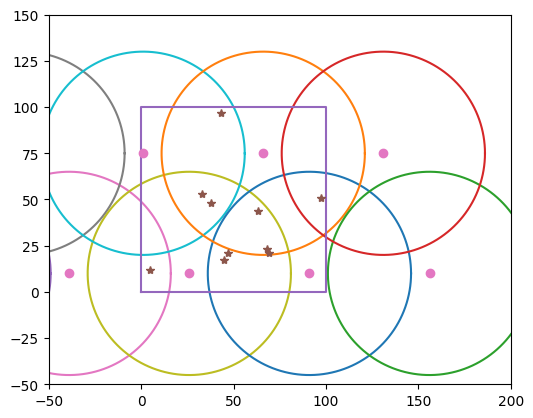

In [7]:
figure, axes = plt.subplots( 1 )

for i in range(SAT_len):
    axes.plot(SATs[i,0,:], SATs[i,1,:])
    axes.plot(SATs[i + SAT_len, 0,:], SATs[i + SAT_len,1,:])

axes.plot([0,100,100,0,0], [0,0,100,100,0])
axes.plot(GSs[:,0], GSs[:, 1], '*')

axes.set_aspect(1)
axes.axis([-50, 200, -50, 150])
axes.plot(SAT_coord[:,0], SAT_coord[:,1], 'o')

plt.show()

In [ ]:
#거리 판단 다시

In [14]:
dist = np.zeros((GS_size, SAT_len*2))

for i in range(GS_size):
    for j in range(SAT_len*2):
        dist[i][j] = np.linalg.norm(GS[i] - SAT[j])


coverage_indicator = np.zeros((GS_size, SAT_len*2))
coverage_index = np.where(dist <= radius)
coverage_indicator[coverage_index[:][0], coverage_index[:][1]] = 1
print(coverage_indicator)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [15]:
print(coverage_index)

(array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8,
       8, 9, 9, 9], dtype=int64), array([20, 42, 43, 19, 41, 42, 19, 20, 42, 19, 20, 42, 41, 42, 19, 41, 42,
       18, 19, 19, 20, 19, 20, 19, 20, 42], dtype=int64))


In [19]:
np.full(10,5)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])